In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Car_sales.csv')

# EDA

In [4]:
df.head(3)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN


In [5]:
df['Vehicle_type'].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
df[df.Fuel_capacity.isnull()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
33,Chrysler,Town & Country,53.48,19.54,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


# Statistical Review

In [10]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [11]:
df.shape

(157, 16)

In [12]:
df_dup = df.copy()

In [13]:
df_dup

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [14]:
df_dup.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [15]:
df_dup.drop(columns = ['Wheelbase', 'Width', 'Length', 'Curb_weight','Latest_Launch'], inplace=True)

In [16]:
df_dup.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

In [17]:
df_dup.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

In [18]:
df_dup.Power_perf_factor = df_dup.Power_perf_factor.fillna(df_dup.Power_perf_factor.mode()[0])

In [19]:
df_dup.Power_perf_factor.isnull().sum()

0

In [20]:
df_dup[['Price_in_thousands', 'Engine_size', 'Horsepower',
       'Fuel_capacity', 'Fuel_efficiency']] = df_dup[['Price_in_thousands', 'Engine_size', 'Horsepower',
       'Fuel_capacity', 'Fuel_efficiency']].apply(lambda x: x.fillna(x.mode()[0]))

In [21]:
df_dup.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             0
Horsepower              0
Fuel_capacity           0
Fuel_efficiency         0
Power_perf_factor       0
dtype: int64

(array([ 2., 13., 17., 20., 19.,  7., 12.,  8.,  4.,  1.,  3.,  2.,  1.,
         1.,  2.,  0.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,
         1.,  0.,  0.,  1.]),
 array([ 5.16      ,  7.23966667,  9.31933333, 11.399     , 13.47866667,
        15.55833333, 17.638     , 19.71766667, 21.79733333, 23.877     ,
        25.95666667, 28.03633333, 30.116     , 32.19566667, 34.27533333,
        36.355     , 38.43466667, 40.51433333, 42.594     , 44.67366667,
        46.75333333, 48.833     , 50.91266667, 52.99233333, 55.072     ,
        57.15166667, 59.23133333, 61.311     , 63.39066667, 65.47033333,
        67.55      ]),
 <BarContainer object of 30 artists>)

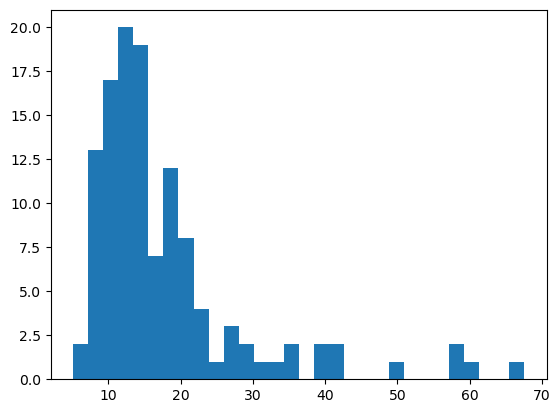

In [22]:
plt.hist(df_dup['__year_resale_value'],bins=30)

<Axes: xlabel='__year_resale_value'>

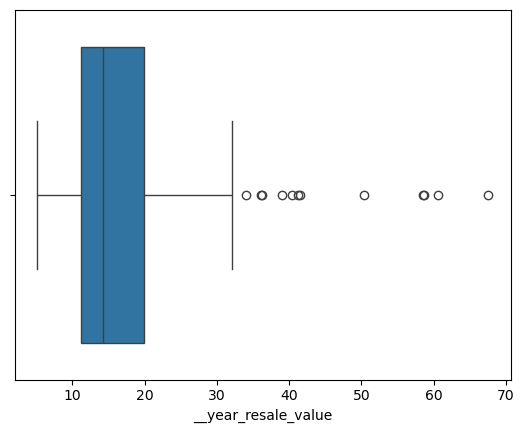

In [23]:
sns.boxplot(x=df_dup['__year_resale_value'])

In [24]:
df_dup.__year_resale_value = df_dup.__year_resale_value.fillna(df_dup.__year_resale_value.mode()[0])

In [25]:
df_dup.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [26]:
df_dup=df_dup.set_index('Manufacturer')

In [27]:
df_dup_corr = df_dup.corr(numeric_only=True)
df_dup_corr

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.184498,-0.298654,0.019871,-0.197531,0.086541,-0.016195,-0.218029
__year_resale_value,-0.184498,1.000000,0.680820,0.425807,0.594254,0.225464,-0.283231,0.625239
Price_in_thousands,-0.298654,0.680820,1.000000,0.626314,0.831343,0.420724,-0.493911,0.899256
Engine_size,0.019871,0.425807,0.626314,1.000000,0.837641,0.659884,-0.732602,0.816216
Horsepower,-0.197531,0.594254,0.831343,0.837641,1.000000,0.498660,-0.609132,0.983592
Fuel_capacity,0.086541,0.225464,0.420724,0.659884,0.498660,1.000000,-0.800908,0.498301
Fuel_efficiency,-0.016195,-0.283231,-0.493911,-0.732602,-0.609132,-0.800908,1.000000,-0.606441
Power_perf_factor,-0.218029,0.625239,0.899256,0.816216,0.983592,0.498301,-0.606441,1.000000


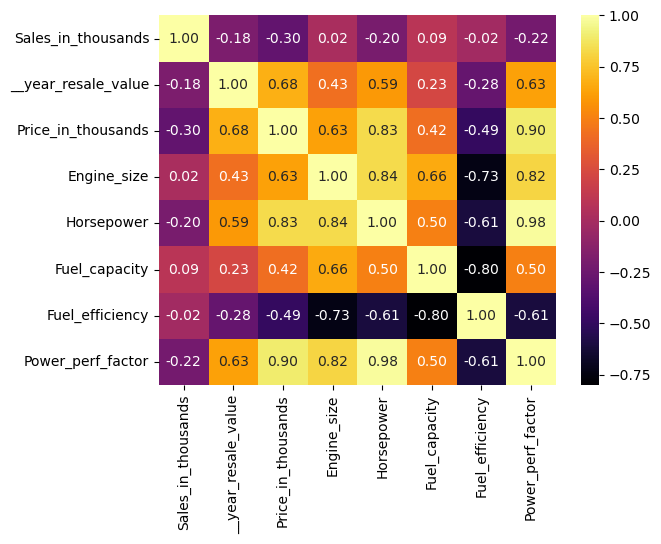

In [28]:
sns.heatmap(df_dup_corr,fmt='.2f', annot=True, cmap='inferno')
plt.show()

# Data Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler

catcol = ['Vehicle_type','Model']

df_dup_enc = pd.get_dummies(df_dup, columns= catcol)
df_dup_enc.astype(int)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Car,Vehicle_type_Passenger,...,Model_Town & Country,Model_Town car,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra
Manufacturer,,,,,,,,,,,,,,,,,,,,,
Acura,16,16,21,1,140,13,28,58,0,1,...,0,0,0,0,0,0,0,0,0,0
Acura,39,19,28,3,225,17,25,91,0,1,...,0,0,0,0,0,0,0,0,0,0
Acura,14,18,12,3,225,17,26,52,0,1,...,0,0,0,0,0,0,0,0,0,0
Acura,8,29,42,3,210,18,22,91,0,1,...,0,0,0,0,0,0,0,0,0,0
Audi,20,22,23,1,150,16,27,62,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo,3,7,24,1,160,15,25,66,0,1,...,0,0,1,0,0,0,0,0,0,0
Volvo,15,7,27,2,168,17,25,70,0,1,...,0,0,0,0,0,0,0,0,0,0
Volvo,17,7,28,2,168,17,25,71,0,1,...,0,0,0,1,0,0,0,0,0,0


In [31]:
df_dup.columns

Index(['Model', 'Sales_in_thousands', '__year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

In [32]:
scaler = StandardScaler()
x = df_dup_enc.drop(columns='Price_in_thousands')
y = df_dup_enc['Price_in_thousands']

x = scaler.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train.shape

(125, 165)

# Model Training

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print(f'mae: {mae}')
print(f"mse: {mse}")
print(f"Train Score: {lr.score(x_train, y_train)}")
print(f"r2_Score: {r2s}")


mae: 7.992485743241145
mse: 148.7915720626971
Train Score: 1.0
r2_Score: 0.566999607601079


In [39]:
from sklearn.ensemble import RandomForestRegressor


In [40]:
rfr = RandomForestRegressor()

In [41]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
y_pred_reg = lr.predict(x_test)

In [43]:
mae_reg = mean_absolute_error(y_test, y_pred)
mse_reg = mean_squared_error(y_test, y_pred)
r2s_reg = r2_score(y_test, y_pred)

print(f'mae_reg: {mae_reg}')
print(f"mse_reg: {mse_reg}")
print(f"Train Score: {rfr.score(x_train, y_train)}")
print(f"r2_Score_reg: {r2s_reg}")

mae_reg: 7.992485743241145
mse_reg: 148.7915720626971
Train Score: 0.9762947587054025
r2_Score_reg: 0.566999607601079


In [44]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=20, max_depth=9, random_state=42)

In [45]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=20, random_state=42)

In [46]:
y_pred_dtree = dt.predict(x_test)

In [47]:
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
r2s_dt = r2_score(y_test, y_pred)

print(f'mae_dt: {mae_dt}')
print(f"mse_dt: {mse_dt}")
print(f"Train Score: {dt.score(x_train, y_train)}")
print(f"r2_Score_dt: {r2s_dt}")

mae_dt: 7.992485743241145
mse_dt: 148.7915720626971
Train Score: 0.7201637466095163
r2_Score_dt: 0.566999607601079
